In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as optim
import scipy.stats as scs
import pandas as pd

from itertools import product

%matplotlib inline

plt.style.use('ggplot')

# Statistical Models and Model Estimation

Our goal today is to begin **fitting statistical models to data** and **understanding some of their mathematical properties**.  At the end of the day we will be able to answer questions like:

  - While getting ready for work, after waking up at 6:00, you observe busses stopping at your bus stop at 6:12, 6:15, 6:20, 6:21, and 6:30, after which you leave to the bus stop at 6:33.  What is the probability you will have to wait longer than 5 minutes for the next bus?
  - You survey 100 randomly chosen students from a university, and find that their average height is 1.6 meters, with 25% of them taller than 1.8 meters.  If the university has 5000 students, approximately how many are taller than 2 meters?
  - Your friend's class notes refer to pages 11, 15, 55, 57, 102, 104, and 202 of a book.  What is a good estimate for the number of pages in the book?

The process for solving problems like this goes:

1. Use domain knowledge and/or creativity to create a **statistical model** for your data, this is a *catalogue* of possible ways that the data may have been generated.
1. **Fit** the statistical model to the data.  This selects **exactly one** of the data generating processes from your catalogue.
1. Use the fitted model to **compute** the thing you want.

The process above is the most basic form of **statistics**.

## Review: Fundamental Concepts

### Random Variables, Again.

Recall that a *random variable* $X$ is a generator of numbers according to some probability distribution. For example, here are some probabilistic statements about an unknown random variable.:

$$ P(X > 0) = 0.5 $$
$$ P(-1 < X < 1) = 0.25 $$
$$ P(X < 0) = 0 $$
$$ P(X > 1 \mid X > 0) = 0.5 $$



In scipy, probability distributions are stored as objects, initialized with the appropriate parameters, and can be sampled from using the `rvs` method.

In [2]:
#scs.distributions.poisson?

In [3]:
lam = 10
pois = scs.distributions.poisson(lam)
pois.rvs()

14

In [4]:
pois.rvs(size=13)

array([10, 15, 10,  8, 13, 12, 11,  4, 10, 15, 14, 12,  7])

### Distribution and Density Functions

One very general probabilistic statement we can make about a random variable is to compute the *function*

$$ F_X(t) = P(X \leq t) $$

this is called the *cumulative distribution* function.  In a sense we could make precise, it says everything we can hope to say about the random variable.

If the distribution function is differentiable, then it's derivative is called the *probability density function*. 

$$ f_X(t) = F_X'(t) $$

The density function satisfies the following property

$$ P(t_0 < X \leq t_1) = \int_{t_0}^{t_1} f(t) dt $$

### Independent and Identically Distributed

If two random variables have the *same* distribution function, we say they are *identically distributed*, and we denote this relationship

$$ X \sim Y $$

In practice this means **any probabilistic statements we make about $X$ and $Y$ have the same answer**.

## A Sampling of Continuous Distributions

### The Uniform Distribution

A *uniformly distributed random variable* is any random variable with the following distribution function

$$ F_{\text{Uniform(a, b)}}(t) = \left\{ \begin{array}{ll} 
0 & t \leq a \\
\frac{1}{b - a}t - \frac{a}{b-a} & a < t \leq b \\
1 & t \geq b \\
\end{array} \right.
$$

with corresponding density function

$$ f_{\text{Uniform(a, b)}}(t) = \left\{ \begin{array}{ll} 
0 & t \leq a \\
b - a & a < t \leq b \\
0 & t \geq b \\
\end{array} \right.
$$

The numbers $a$ and $b$ can be set to anything, as long as $a < b$.  These are called the *parameters* of the distribution.

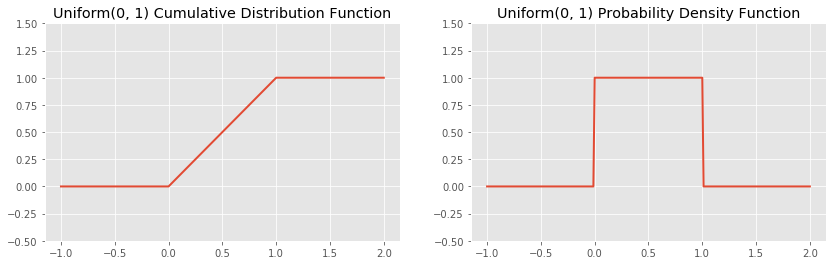

In [5]:
a, b = (0, 1)
unif = scs.distributions.uniform(loc=a,scale=b-a)

x = np.linspace(-1, 2, num=250)
fig, ax = plt.subplots(1, 2, figsize=(14, 4))

ax[0].plot(x, unif.cdf(x), linewidth=2)
ax[0].set_ylim(-0.5, 1.5)
ax[0].set_title("Uniform(0, 1) Cumulative Distribution Function")

ax[1].plot(x, unif.pdf(x), linewidth=2)
ax[1].set_ylim(-0.5, 1.5)
ax[1].set_title("Uniform(0, 1) Probability Density Function");

If we sample from a random variable many times, and draw a histogram of the resulting values, the picture will approximate the density function of the random variable

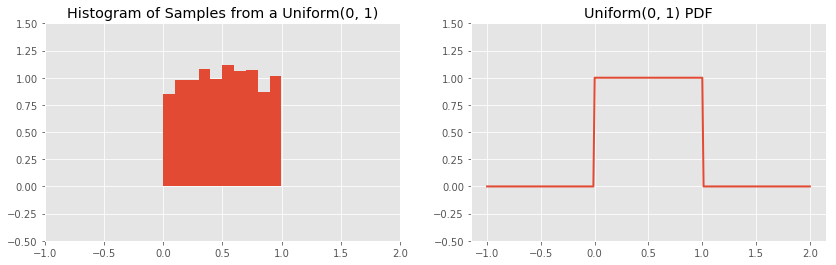

In [6]:
unif_samples = unif.rvs(size=2500)

x = np.linspace(-1, 2, num=250)
fig, ax = plt.subplots(1, 2, figsize=(14, 4))

ax[0].hist(unif_samples, normed=True)
ax[0].set_xlim(-1, 2)
ax[0].set_ylim(-0.5, 1.5)
ax[0].set_title("Histogram of Samples from a Uniform(0, 1)")

ax[1].plot(x, unif.pdf(x), linewidth=2)
ax[1].set_ylim(-0.5, 1.5)
ax[1].set_title("Uniform(0, 1) PDF");

**Question:** What are some real life examples of uniform random variables?

### The Exponential Distribution

An *exponentially distributed random variable* is any random variable with the following distribution function

$$ F_{\text{Exponential(a)}}(t) = 1 - e^{-at} $$

or, equivalently, the following density function

$$ f_{\text{Exponential(a)}}(t) = a e^{at} $$

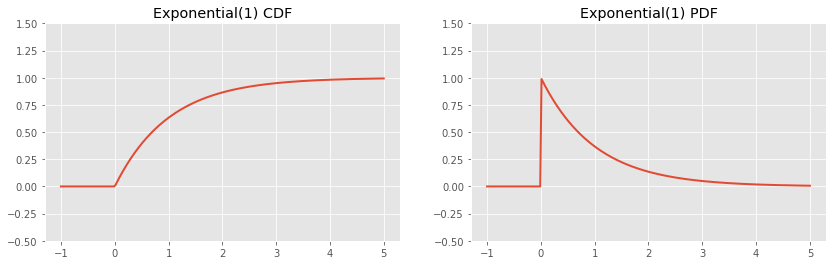

In [7]:
lam_e = 1
expon = scs.distributions.expon(scale=1/lam_e)

x = np.linspace(-1, 5, num=250)
fig, ax = plt.subplots(1, 2, figsize=(14, 4))

ax[0].plot(x, expon.cdf(x), linewidth=2)
ax[0].set_ylim(-0.5, 1.5)
ax[0].set_title("Exponential(1) CDF")

ax[1].plot(x, expon.pdf(x), linewidth=2)
ax[1].set_ylim(-0.5, 1.5)
ax[1].set_title("Exponential(1) PDF");

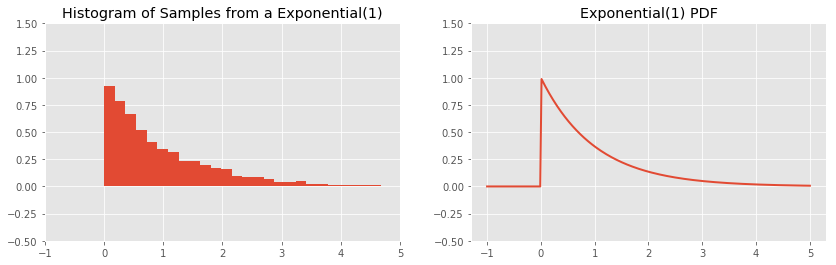

In [8]:
expon_samples = expon.rvs(size=2500)

x = np.linspace(-1, 5, num=250)
fig, ax = plt.subplots(1, 2, figsize=(14, 4))

ax[0].hist(expon_samples, bins=50, normed=True)
ax[0].set_xlim(-1, 5)
ax[0].set_ylim(-0.5, 1.5)
ax[0].set_title("Histogram of Samples from a Exponential(1)")

ax[1].plot(x, expon.pdf(x), linewidth=2)
ax[1].set_ylim(-0.5, 1.5)
ax[1].set_title("Exponential(1) PDF");

**Question:** What are some real life examples of some exponential random variables?

### The Normal (Gaussian) Distribution

The *normal* or *gaussian* distribution has a hallowed place in statistical folklore, mostly due to the *central limit theorem* which we will study shortly.

The traditional notation for a normal random variable is $Z$ (instead of $X$, used for pretty much any other random variable).

A normal random variable $Z$ has the cumulative distribution function

$$ \Phi (t) = \frac{1}{\sqrt{2 \sigma^2 \pi}} \int_{- \infty}^t e^{ - \frac{(x - \mu)^2}{2 \sigma^2} } dx $$

The $\Phi$ is, again, traditional notation for the distribution function of a normal random variable. 

By differentiating, we get the density function of a normal random variable

$$ \phi (t) =\frac{1}{\sqrt{2 \pi \sigma^2}} e^{ - \frac{(x - \mu)^2}{2 \sigma^2} } $$

This indefinite integral does *not* have a closed form.  In practice, the only way to compute values of the distribution function of a normal random variable is to use a computer.

The $\mu$ and $\sigma$ are the parameters of the distribution.  

Changing $\mu$ translates the distribution function to the right and left

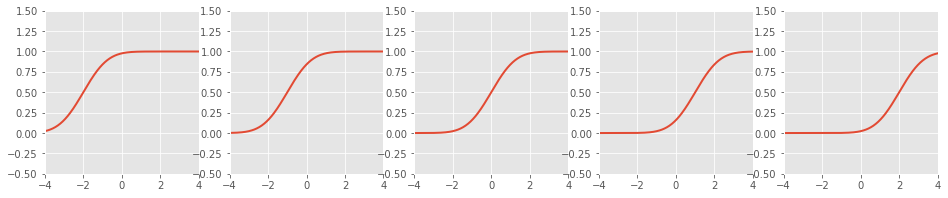

In [9]:
sig = 1
normal_dists_varying_mean = [
    scs.distributions.norm(mu, sig) for mu in [-2, -1, 0, 1, 2]
]

x = np.linspace(-4, 4, num=250)
fig, axs = plt.subplots(1, 5, figsize=(16, 3))

for i, ax in enumerate(axs.flatten()):
    ax.plot(x, normal_dists_varying_mean[i].cdf(x), linewidth=2)
    ax.set_ylim(-0.5, 1.5)
    ax.set_xlim(-4, 4)

Changing $\sigma$ stretches and shrinks the distribution function horizontally

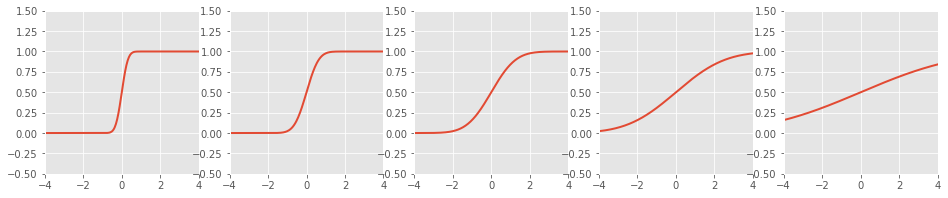

In [10]:
mu = 0
normal_dists_varying_sigma = [
    scs.distributions.norm(mu, sigma) for sigma in [0.25, 0.5, 1, 2, 4]
]

x = np.linspace(-4, 4, num=250)
fig, axs = plt.subplots(1, 5, figsize=(16, 3))

for i, ax in enumerate(axs.flatten()):
    ax.plot(x, normal_dists_varying_sigma[i].cdf(x), linewidth=2)
    ax.set_ylim(-0.5, 1.5)
    ax.set_xlim(-4, 4)

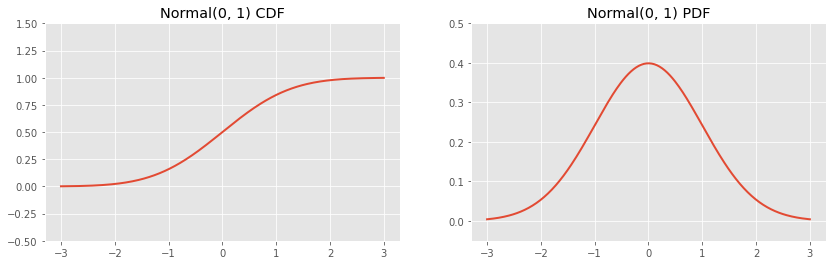

In [11]:
mu = 0
sig = 1
normal = scs.distributions.norm(mu, sig)

x = np.linspace(-3, 3, num=250)
fig, ax = plt.subplots(1, 2, figsize=(14, 4))

ax[0].plot(x, normal.cdf(x), linewidth=2)
ax[0].set_ylim(-0.5, 1.5)
ax[0].set_title("Normal(0, 1) CDF")

ax[1].plot(x, normal.pdf(x), linewidth=2)
ax[1].set_ylim(-0.05, 0.5)
ax[1].set_title("Normal(0, 1) PDF");

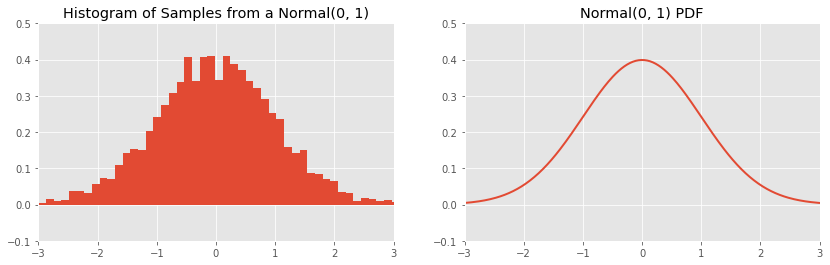

In [12]:
normal_samples = normal.rvs(size=2500)

x = np.linspace(-3, 3, num=250)
fig, ax = plt.subplots(1, 2, figsize=(14, 4))

ax[0].hist(normal_samples, bins=50, normed=True)
ax[0].set_xlim(-3, 3)
ax[0].set_ylim(-0.1, 0.5)
ax[0].set_title("Histogram of Samples from a Normal(0, 1)")

ax[1].plot(x, normal.pdf(x), linewidth=2)
ax[1].set_xlim(-3, 3)
ax[1].set_ylim(-0.1, 0.5)
ax[1].set_title("Normal(0, 1) PDF");

**Discussion:** How would the above discussion change if we had *discrete* random variables?  What are some important examples of discrete random variables?

## Probability vs. Statistics

Probability and Statistics are closely related subjects, but there is a fundamental difference.

### Probability

In **probability** we *know* the parameters of a distribution (associated with some random variable), and we would like to study properties of data generated from that distribution. Our tool was the **expectation value**.

#### In general, we can calculate expected values of an arbitrary function of X
- Remember: 
 - for a continuous random variable, the sample space of $X$ is the entire real line
 - for a discrete random variable, the sample space of $X$ is some finite set of values $S$
-  Expected value of $g(X)$
 - continuous: $E[g(X)] = \int_{-\infty}^{\infty} g(x)\, f_X(x) \,dx$
 - discrete: $ E[g(X)] = \sum\limits_{s\in S} g(s)\, P(X=s) $



#### Mean of a random variable: $\mu = \text{E}[X]$
-  "Expected value of X"
-  Discrete random variable: $\text{E}[X] = \sum\limits_{x \in S} x \,\text{P}(X=x)$

-  Continuous random variable: $\text{E}[X] = \int_{-\infty}^{\infty} x\,f_X(x) \,dx$

-  Helpful Properties:
 - scalar multiplication: $\text{E}[cX] = c\text{E}[X]$
 - addition: $\text{E}[X + Y] = \text{E}[X] + \text{E}[Y]$
 - expectation of a constant: $\text{E}[c] = c$

#### Variance of a random variable: $\sigma^2 = \text{Var}(X) = \text{E}[(X - \text{E}[X])^2]$
-  "Expected value of the square of the deviation of X from its mean"
-  Discrete: $\sigma^2 = \sum\limits_{x \in S} (x-\mu)^2 \text{P}(X=x)$

-  Continuous: $\sigma^2 = \int_{-\infty}^{\infty} (x-\mu)^2 f(x) \,dx$

-  Helpful Properties:
 - scalar multiplication: $\text{Var}(cX) = c^2\text{Var}(X)$
 - addition: $\text{Var}(X + Y) = \text{Var}(X) + \text{Var}(Y) + 2\text{Cov}(X,Y)$
 - variance of a constant: $\text{Var}(c) = 0$
 - $\text{Var}(X) = \text{E}[X^2] - (\text{E}[X])^2 $ (can you prove this?)
    - $\text{E}[X^2] = \text{Var}(X) + (\text{E}[X])^2 = \sigma^2 + \mu^2  $

#### In general, we can calculate expected values of arbitrary powers of X

-  nth raw moment: $\mu_n = E[X^n]$

-  nth central moment: $\mu'_n = E[(X - E[X])^n]$


#### If you *know* the parameters of the distribution, then you can *compute* all of these expectation values


### Statistics

In **statistics** we have data generated from a random variable, and we would like to *infer* properties of its distribution.

A few points are evident:

  - Independent and identically distributed data are important, as they allow us to pool information using data all generated from *indistinguishable* random variables.
  - We can never know *exactly* the parameters that generated the data, we can only hope to approximate them.
  - We *may* be able to quantify the uncertainty in our approximation, this is what much of classical statistics is about.

**Question**: Statistics, in its early days, was called *inverse probability*.  Can you see why?

## Statistical Models

So, we arrive at a very fundamental question:  **Just what is a statistical model anyway?**

Suppose we have some static, fixed data.  Here's an example dataset:

In [13]:
data = scs.distributions.norm(0.1,0.7).rvs(size=50)
print(data)

[-0.46811449 -0.59433687 -0.4110654   0.30153043 -0.08215841 -0.58340093
  0.77102561 -0.21310998  0.39096179  1.98647997 -0.45259645 -0.65463516
 -0.41277781 -0.26391552 -0.1779671   0.48111311 -0.92580701  1.396054
 -0.10490198 -0.20532658 -0.78296625  0.28206631  0.08937666  1.32646938
  0.64428891  0.37871508 -0.59950032  0.81326889  0.20010928 -0.3184705
 -0.84772247 -0.40204946  0.39842188 -0.01688035  0.54775137 -0.84477684
  0.89545951  0.24499964 -0.56572366  1.3889281  -1.65057272 -1.04118478
 -0.27121704  0.01648568  0.53884911 -1.01272291  1.19425052 -1.65747795
  0.77328863  0.25190475]


In [14]:
data.max()

1.9864799665801347

In [15]:
data.min()

-1.6574779474903321

We'll probably learn more if we actually draw some pictures of this data set.  For a one dimensional data set there are a few options, but a scatter plot is always a good default choice because it

  - Shows all the data
  - Is easy to interpret
  - Doesn't lose any information

In [16]:
def one_dim_scatterplot(data, ax, jitter=0, **options):
    if jitter:
        jitter = np.random.uniform(-jitter, jitter, size=data.shape)
    else:
        jitter = np.repeat(0.0, len(data))
    ax.scatter(data, jitter, **options)
    ax.yaxis.set_ticklabels([])
    ax.set_ylim([-1, 1])

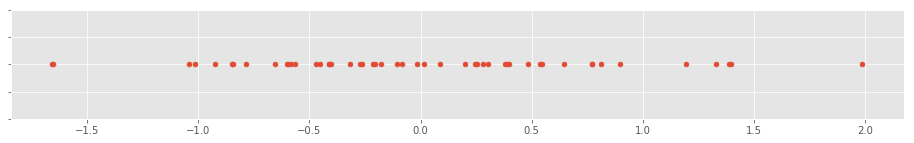

In [17]:
fig, ax = plt.subplots(1, figsize=(16, 2))
one_dim_scatterplot(data, ax, s=25, jitter=0.0)

#### The Empirical Cumulative Distribution Function

Another possibility for one dimensional data visualization is to plot the **empirical cumulative distribution function**:

In [18]:
def empirical_distribution(x_array, data):
    count = np.zeros(shape=len(x_array))
    for datum in data:
        count = count + (datum <= x_array)
    return count / len(data)

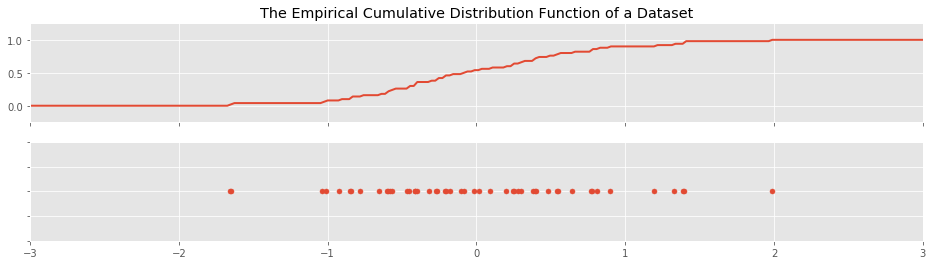

In [19]:
fig, ax = plt.subplots(2, 1, figsize=(16, 4), sharex=True)

x = np.linspace(-3, 3, num=250)
ax[0].plot(x, empirical_distribution(x, data), linewidth=2)
ax[0].set_ylim(-0.25, 1.25)
ax[0].set_xlim(-3, 3)
one_dim_scatterplot(data, ax[1], s=25, jitter=0)
ax[0].set_title("The Empirical Cumulative Distribution Function of a Dataset");

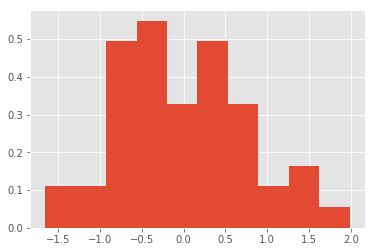

In [20]:
plt.hist(data, normed=True);

In [21]:
np.percentile(data, 75)

0.46044030002710801

**Question:** How is the EDF drawn? When does it increase?  How much does it increase each time?  What is it attempting to approximate?

#### The Empirical Distribution

The empirical distribution function really is the CDF of a distribution (though it's a bit of a weird one when you first see it).

If you have a dataset ${x_1, x_2, \ldots, x_n}$, then you can make a distribution by putting a weight of $\frac{1}{n}$ on each data point.  That is, when you sample from this distribution, you just take one of the datapoints from the dataset, and each data point is equally likely to be chosen.

In [22]:
np.ones(15)

array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.])

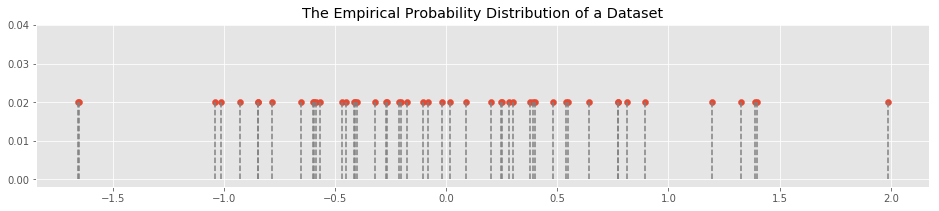

In [23]:
fig, ax = plt.subplots(figsize=(16, 3), sharex=True)

n_data = len(data)
y = np.ones(n_data)/n_data

ax.scatter(data, y)
ax.vlines(x=data, ymin=0, ymax=(1/n_data), color='grey', linestyle='--')
ax.set_title("The Empirical Probability Distribution of a Dataset");

**Question:** Say you draw a sample from this distribution (of any size).  How would you describe this process?

Samples taken from the empirical probability distribution of a dataset are called **Bootstrap Samples**, and they are very important in modern, computer aided statistics.

## Introductory Definitions

We would like to do some statistics, that is, go **from** the data, **to** an understanding of a process that may have generated the data.

A **statistical model** is a collection of random variables, each of which is hypothesized to possibly have generated the data.  Different random variables in the collection are usually distinguished by **parameters**.

**Fitting a statistical model to data** is any process that combines a model with data, and uses the data to select one and only one random variable from the model.  This often takes the form of **determining the parameters for one and only one of the random variables in the model**.  These estimated values of the parameters are called **parameter estimates**.

**Warning:** This terminology is one of the *most abused* in all of statistics.  Formally, the *model* is a **collection** of possible data generating process, but *everyone* also refers to the *single* object you get after fitting the model to data as "the model".  **Seriously everyone does this**, but it's technically incorrect.

**Questions**:
    
What are appropriate statistical models for the following situations:
    
  - You ride an airplane and observe if you catch the flu.
  - You count the number of busses stopping at a bus stop in a given interval of time.  
  - You randomly choose students from a university, and measure their heights.

### Example: Normal Distribution with Unknown Mean, and Known Variance.

Let's fit a model to our data from before.  Suppose we suspect, because we are smart and can infer such things, that our data is generated from a normal distribution with **unknown mean**, but we know the variance is $1$ (this is not something you can generally know, we're assuming it here just for simplicity).

Then, our **statistical model** is the following collection of random variables:

$$ M = \{ N(\mu, 1) \mid \mu \in \mathbb{R} \} $$

The **parameter** at play is the unknown mean of the normal distribution (since we are assuming we know the variance, that's not a parameter).


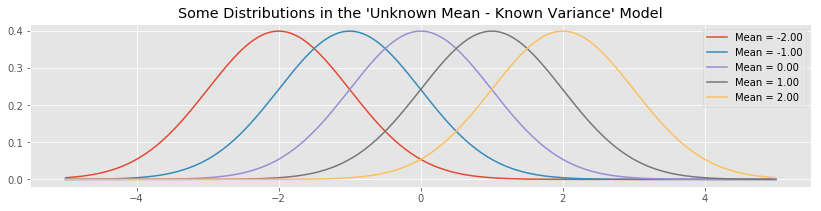

In [24]:
x = np.linspace(-5, 5, num=250)
fig, ax = plt.subplots(figsize=(14, 3))

means = np.linspace(-2, 2, num=5)
for mean in means:
    normal = scs.distributions.norm(mean, 1)
    ax.plot(x, normal.pdf(x), label="Mean = {:2.2f}".format(mean))
    
ax.legend()
ax.set_title("Some Distributions in the 'Unknown Mean - Known Variance' Model");


Fitting the model to data is any process that selects exactly *one* of these distributions.  This reduces, in this case, to selecting the mean parameter $\mu$ of the unknown normal distribution.

### The Eyeball Method

Let's fit our model with the **eyeball method**. We will sample new data sets of the same size as our data from normal distributions of varying mean, and then pick the distribution that best resembles our data.

In [25]:
def text_in_blank_plot(text, ax):
    _ = ax.text(0.5, 0.5, text, 
                horizontalalignment='center',
                verticalalignment='center',
                fontsize=22)
    ax.axis('off')

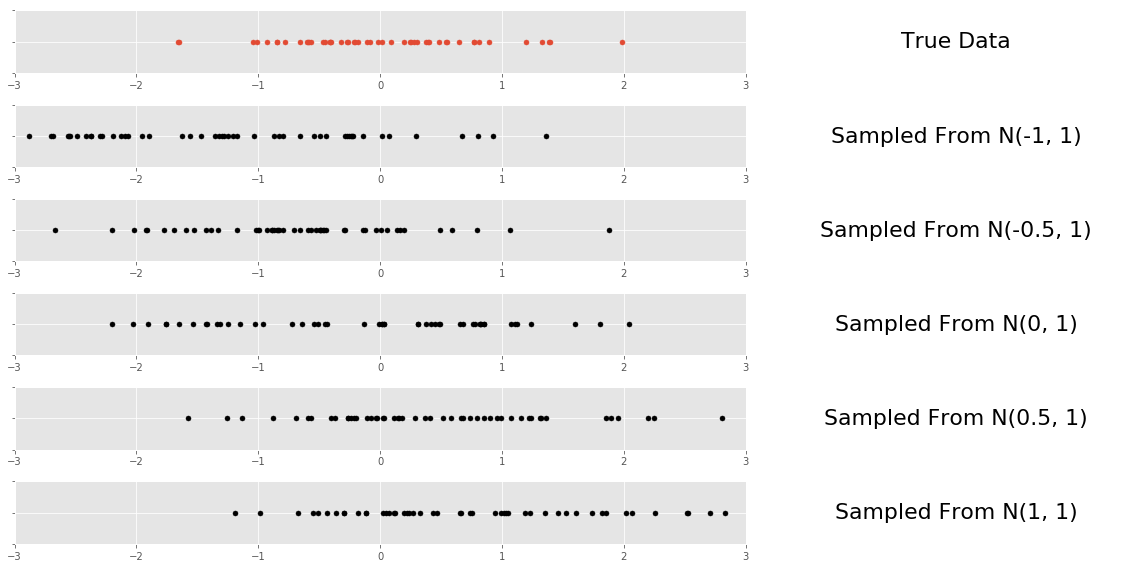

In [26]:
means = [-1, -0.5, 0, 0.5, 1]

fig = plt.figure(figsize=(16, 8)) 
ax = plt.subplot2grid((6, 3), (0, 0), colspan=2)
ax.set_xlim(-3, 3)
one_dim_scatterplot(data, ax, s=25, jitter=0)
ax = plt.subplot2grid((6, 3), (0, 2), colspan=1)
text_in_blank_plot("True Data", ax)

for i, mu in enumerate(means):
    normal = scs.distributions.norm(mu, 1)
    sample = normal.rvs(50)
    ax = plt.subplot2grid((6, 3), (i + 1, 0), colspan=2)
    ax.set_xlim(-3, 3)
    one_dim_scatterplot(sample, ax, s=25, c="black")
    ax = plt.subplot2grid((6, 3), (i + 1, 2), colspan=1)
    text_in_blank_plot("Sampled From N({}, 1)".format(mu), ax)
plt.tight_layout()

Another way to eyeball is to compare the **empirical CDF** to the actual CDFs of the candidate distributions.

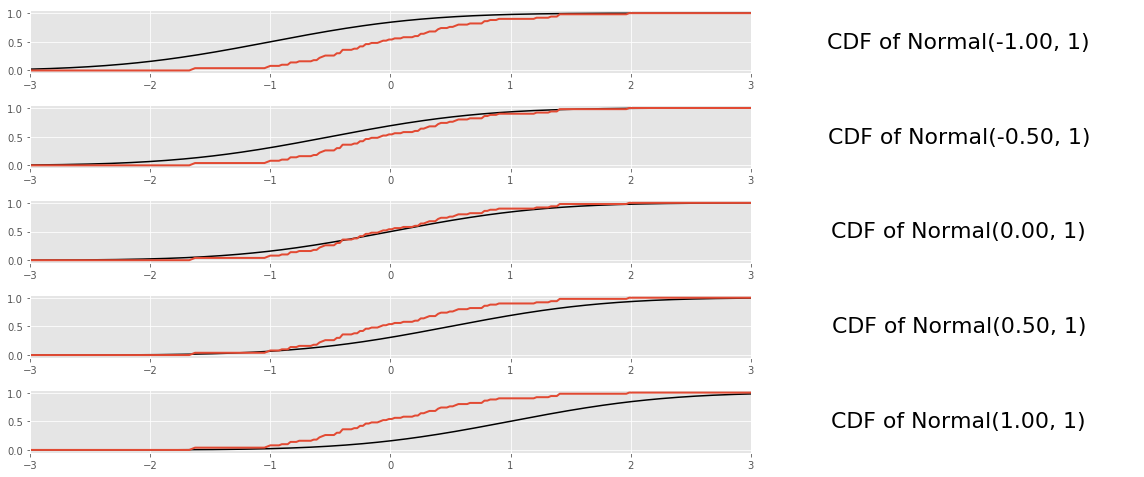

In [27]:
means = [-1, -0.5, 0, 0.5, 1]

fig = plt.figure(figsize=(16, 8)) 

x = np.linspace(-3, 3, num=250)

for i, mu in enumerate(means):
    normal = scs.distributions.norm(mu, 1)
    ax = plt.subplot2grid((6, 3), (i + 1, 0), colspan=2)
    ax.set_xlim(-3, 3)
    ax.plot(x, normal.cdf(x), color="black")
    ax.plot(x, empirical_distribution(x, data), linewidth=2)
    ax = plt.subplot2grid((6, 3), (i + 1, 2), colspan=1)
    text_in_blank_plot("CDF of Normal({:2.2f}, 1)".format(mu), ax)
plt.tight_layout()

It's kind of hard to eyeball here, but it looks like, out of these five choices, $N(0, 1)$ is our best choice.

This eyeball method clearly has some downfalls

  - To make it feasible, we needed to discretize the values of $\mu$ we were considering to a small set.  It would be better to consider *all* the possible $\mu$'s at once.
  - If there were more parameters, mean and variance for example, the number of candidate distributions we needed to consider would grow exponentially.
  - It's hard to eyeball which candidate looks best by comparing simulated to real data.  Ideally we'd have some metric or score for evaluating "how different are the datasets?".

Let's look at two methods that address the above concerns: the **method of moments** and the **method of maximum likelihood**.

### Method of Moments

The *method of moments* is the older method of model fitting.

Suppose we are fitting a *one parameter* statistical model to some known data.  **Recall** that a statistical model is a set of candidate distributions (or, random variables), one of which we suspect generated the data.  The *method of moments* chooses the candidate model as follows:

  - Compute the population expectation (i.e., the expectation) $E[X]$ for each of the distributions in the model.  This part takes some math, or at least some Wikipedia.  The result will be some function of the parameter.
  - Compute the sample mean of the data.  This is a number.
  - Equate the population and sample means, solve for the parameter.
  
The solution is the *method of moments* estimate of the parameter.

### Example: MOM Estimate for Single Parameter Normal Model.

Let's compute the method of moments estimator for the model from our previous example.

$$ M = \{ N(\mu, 1) \mid \mu \in \mathbb{R} \} $$

The population mean of a distribution $N(\mu, 1)$ is simply $\mu$.  Easy.

The sample mean of our data is

In [28]:
mu_hat = np.mean(data)
print(mu_hat)

-0.00499160641237


The method of moments estimate is then found by equating the population mean with the sample mean, which is easy in this case.

$$ \hat \mu = 0.002577 $$

We can check that our estimate is sensible by comparing our original data set with samples drawn from the fit distribution.

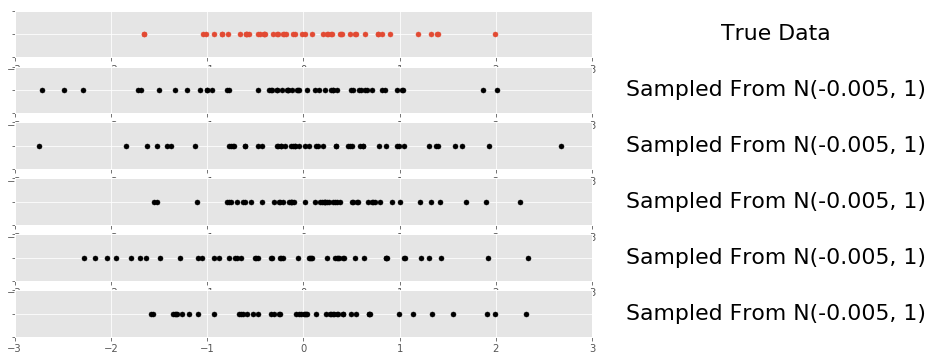

In [29]:
fig = plt.figure(figsize=(16, 6)) 
ax = plt.subplot2grid((6, 3), (0, 0), colspan=2)
ax.set_xlim(-3, 3)
one_dim_scatterplot(data, ax, s=25)
ax = plt.subplot2grid((6, 3), (0, 2), colspan=1)
text_in_blank_plot("True Data", ax)

for i, mu in enumerate(means):
    normal = scs.distributions.norm(mu_hat, 1)
    sample = normal.rvs(50)
    ax = plt.subplot2grid((6, 3), (i + 1, 0), colspan=2)
    ax.set_xlim(-3, 3)
    one_dim_scatterplot(sample, ax, s=25, c="black")
    ax = plt.subplot2grid((6, 3), (i + 1, 2), colspan=1)
    text_in_blank_plot("Sampled From N({0:0.3f}, 1)".format(mu_hat), ax)

There are two other ways we could visualize the fit of our model to the data.

*First* we can superimpose the density function of the fit random variable over a histogram of our data:

In [30]:
def superimpose_pdf_of_fit_model(data, model, ax, x_lower=-3, x_upper=3, bins=25):
    x = np.linspace(x_lower, x_upper, num=250)
    _ = ax.hist(data, bins=bins, normed=True, color="black", alpha=0.4)
    ax.plot(x, model.pdf(x), linewidth=3)

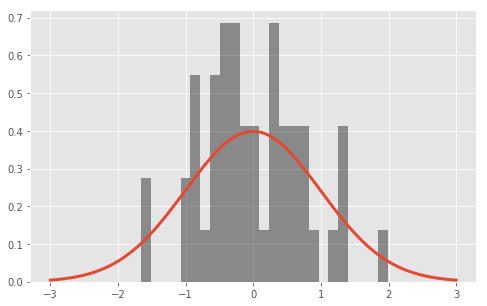

In [31]:
fit_one_param_model = scs.distributions.norm(mu_hat, 1)

fig, ax = plt.subplots(1, figsize=(8, 5))
superimpose_pdf_of_fit_model(data, fit_one_param_model, ax)

We could also superimpose the empirical distribution function of our data over the *actual* distribution function of the fit model.

In [32]:
def superimpose_cdf_of_fit_model(data, model, ax, x_lower=-3, x_upper=3):
    x = np.linspace(x_lower, x_upper, num=250)
    ax.plot(x, empirical_distribution(x, data), linewidth=2)
    ax.plot(x, model.cdf(x), linewidth=2)

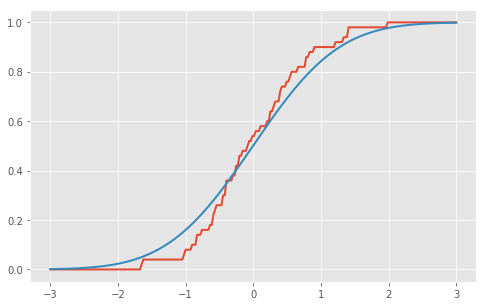

In [33]:
fig, ax = plt.subplots(1, figsize=(8, 5))
superimpose_cdf_of_fit_model(data, fit_one_param_model, ax)

The fit looks ok, but not great.  We can see this clearly in the overlay of the cumulative distribution functions, the empirical distribution function of that data increases much faster than that of the fitted model.

**Discussion:** How does this plot suggest that we modify our model to acheive a better fit to our data?

### Example: Method of Moments for a Two Parameter Normal Model

Now suppose we expand our model to *two* parameters

$$ M = \{ N(\mu, \sigma^2) \mid \mu \in \mathbb{R}, \sigma^2 \in \mathbb{R}^+ \} $$

The method of moments generalizes easily

  - Compute the population mean *and variance* of each of the distributions in the model.
  - Compute the sample mean *and sample variance* of the data.
  - Equate the population and sample means, and population and sample variances.  The result will be two equations in two unknowns.  Solve for the parameters.

In our running example, the sample means and standard deviations are

In [34]:
mu_hat = np.mean(data)
sigma_sq_hat = np.var(data)
print("Sample Mean: {0:.3f}".format(mu_hat))
print("Sample Variance: {:.3f}".format(sigma_sq_hat))

Sample Mean: -0.005
Sample Variance: 0.586


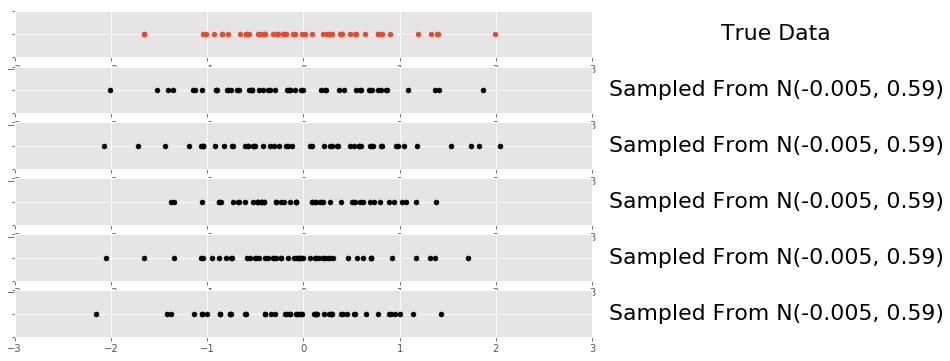

In [35]:
fig = plt.figure(figsize=(16, 6)) 
ax = plt.subplot2grid((6, 3), (0, 0), colspan=2)
ax.set_xlim(-3, 3)
one_dim_scatterplot(data, ax, s=25)
ax = plt.subplot2grid((6, 3), (0, 2), colspan=1)
text_in_blank_plot("True Data", ax)

for i, mu in enumerate(means):
    normal = scs.distributions.norm(mu_hat, np.sqrt(sigma_sq_hat))
    sample = normal.rvs(50)
    ax = plt.subplot2grid((6, 3), (i + 1, 0), colspan=2)
    ax.set_xlim(-3, 3)
    one_dim_scatterplot(sample, ax, s=25, c="black")
    ax = plt.subplot2grid((6, 3), (i + 1, 2), colspan=1)
    text_in_blank_plot("Sampled From N({0:0.3f}, {1:0.2f})".format(mu_hat, sigma_sq_hat), ax)

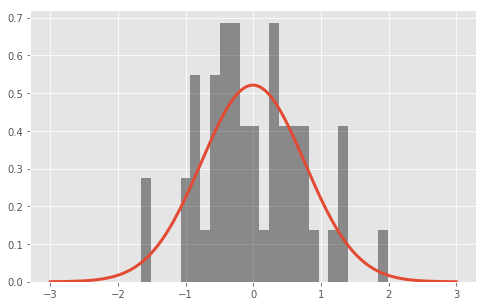

In [36]:
fit_two_param_model = scs.distributions.norm(mu_hat, np.sqrt(sigma_sq_hat))

fig, ax = plt.subplots(1, figsize=(8, 5))
superimpose_pdf_of_fit_model(data, fit_two_param_model, ax)

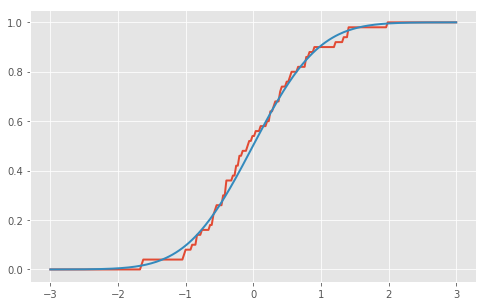

In [37]:
fig, ax = plt.subplots(1, figsize=(8, 5))
superimpose_cdf_of_fit_model(data, fit_two_param_model, ax)

### Appendix:  An Awful Model Specification

We haven't had much to say about how to *choose* an appropriate model, and doing so badly can be disastrous.

Consider the following data generating process

  - Flip a coin
      - If the coin lands heads, sample a point from a $\text{Unif}(-1.5, 1.5)$.
      - If the coin is tails, flip another coin
          - If the coin is heads, sample a point from a $\text{Unif}(-1.5, -0.5)$
          - If the coin is tails, sample a point from a $\text{Unif}(0.5, 1.5)$
          
This kind of process creates what is termed a **mixture** distribution.

In [38]:
def generate_uniform_mixture(n):
    a1, b1 = (-1.5, 1.5)
    a2, b2 = (-1.5, -0.5)
    a3, b3 = (0.5, 1.5)
    unif1 = scs.distributions.uniform(a1,b1-a1).rvs(size=n)
    unif2 = scs.distributions.uniform(a2,b2-a2).rvs(size=n)
    unif3 = scs.distributions.uniform(a2,b2-a2).rvs(size=n)

    bernoulli = scs.distributions.binom(1,0.5).rvs(size=n)
    bernoulli2 = scs.distributions.binom(1,0.5).rvs(size=n)

    return bernoulli * unif1 + (1 - bernoulli) * (
        bernoulli2 * unif2 + (1 - bernoulli2) * unif3 
    )

In [39]:
np.random.seed(154)
unif_mixture_data = generate_uniform_mixture(100)

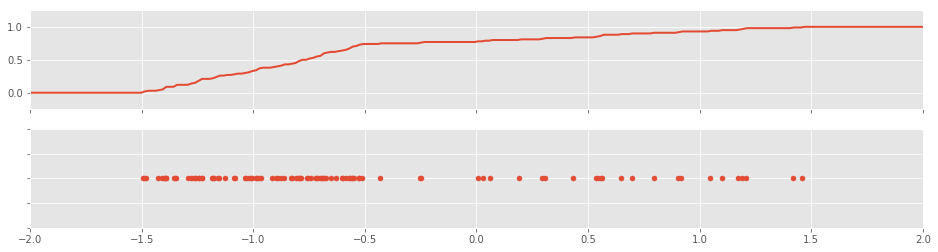

In [40]:
fig, ax = plt.subplots(2, 1, figsize=(16, 4), sharex=True)

x = np.linspace(-2, 2, num=250)
ax[0].plot(x, empirical_distribution(x, unif_mixture_data), linewidth=2)
ax[0].set_xlim(-2, 2)
ax[0].set_ylim(-0.25, 1.25)
one_dim_scatterplot(unif_mixture_data, ax[1], s=25)

Suppose we specified a model *without visualizing the data*.  This seems insane, but it is routine in some disciplines (don't do this).

Let's pick a badly specified model

$$ M = \{ \text{Unif}(a, b) \mid a < b \} $$

That is, our model assumes that the data is generated from a *single* uniform distribution.

The population mean and variance of the uniform distribution are

$$ \mu = \frac{a + b}{2} $$
$$ \sigma^2 = \frac{(b - a)^2}{12} $$

The sample mean and variance are

In [41]:
mu_hat = np.mean(unif_mixture_data)
sigma_sq_hat = np.var(unif_mixture_data)
print("Sample Mean: {0:1.3f}".format(mu_hat))
print("Sample Variance: {0:1.3f}".format(sigma_sq_hat))

Sample Mean: -0.566
Sample Variance: 0.597


So the equations for the MOM estimate are

$$ \frac{a + b}{2} = \hat{\mu} $$
$$ \frac{(b - a)^2}{12} = \hat{\sigma}^2 $$

Whose solutions can be found as

$$ a = \hat\mu - \sqrt{3 \hat{\sigma}^2} $$
$$ b = \hat\mu + \sqrt{3 \hat{\sigma}^2} $$

**Exercise:** Do all the math.

In [42]:
a, b = mu_hat - np.sqrt(3 * sigma_sq_hat), mu_hat + np.sqrt(3 * sigma_sq_hat)

print("a = {0:2.2f}".format(a))
print("b = {0:2.2f}".format(b))

a = -1.91
b = 0.77


The poor fit of our model is clear when comparing simulated data to the truth

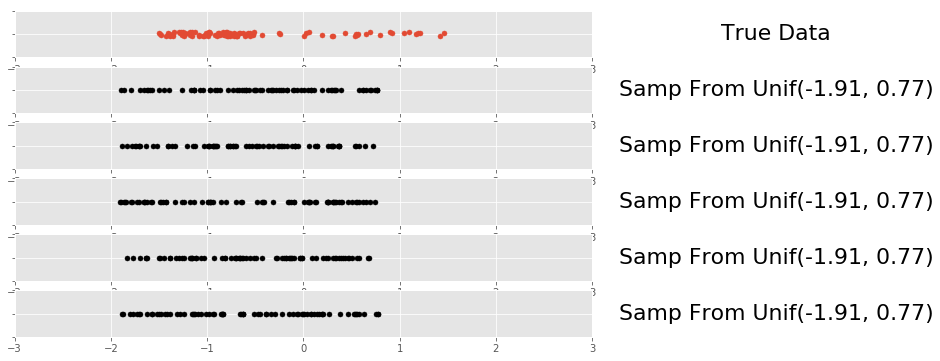

In [43]:
fig = plt.figure(figsize=(16, 6)) 
ax = plt.subplot2grid((6, 3), (0, 0), colspan=2)
ax.set_xlim(-3, 3)
one_dim_scatterplot(unif_mixture_data, ax, s=25, jitter=0.1)
ax = plt.subplot2grid((6, 3), (0, 2), colspan=1)
text_in_blank_plot("True Data", ax)

for i, mu in enumerate(means):
    unif = scs.distributions.uniform(a,b-a)
    sample = unif.rvs(75)
    ax = plt.subplot2grid((6, 3), (i + 1, 0), colspan=2)
    ax.set_xlim(-3, 3)
    one_dim_scatterplot(sample, ax, s=25, c="black")
    ax = plt.subplot2grid((6, 3), (i + 1, 2), colspan=1)
    text_in_blank_plot("Samp From Unif({0:2.2f}, {1:2.2f})".format(a, b), ax)

Look at that. Ugh. The simulated data from our fitted model clearly didn't capture the limits of our original data, and it's too dense in some places and not dense enough in others.

The bad fit of our model to the data would cause anything we learn from it to be a bad approximation to the truth.  We clearly need to develop tools to help us better specify models.

We can get an even better look at this poor fitting using histograms

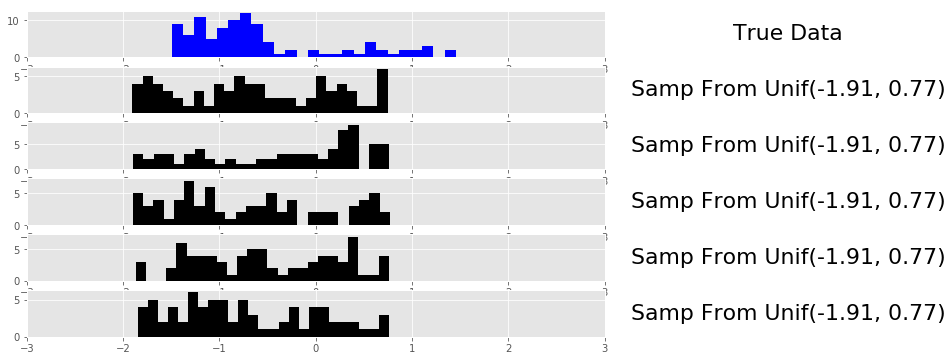

In [44]:
fig = plt.figure(figsize=(16, 6)) 
ax = plt.subplot2grid((6, 3), (0, 0), colspan=2)
ax.set_xlim(-3, 3)
ax.hist(unif_mixture_data, bins=25, color="blue")
ax = plt.subplot2grid((6, 3), (0, 2), colspan=1)
text_in_blank_plot("True Data", ax)

for i, mu in enumerate(means):
    unif = scs.distributions.uniform(a,b-a)
    sample = unif.rvs(75)
    ax = plt.subplot2grid((6, 3), (i + 1, 0), colspan=2)
    ax.set_xlim(-3, 3)
    ax.hist(sample, bins=25, color="black")
    ax = plt.subplot2grid((6, 3), (i + 1, 2), colspan=1)
    text_in_blank_plot("Samp From Unif({0:2.2f}, {1:2.2f})".format(a, b), ax)

And finally, superimposing the fit density and distribution functions gives even more information.

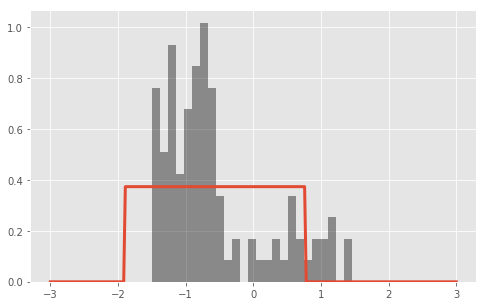

In [45]:
fit_unif_model = scs.distributions.uniform(a, b-a)

fig, ax = plt.subplots(1, figsize=(8, 5))
superimpose_pdf_of_fit_model(unif_mixture_data, fit_unif_model, ax)

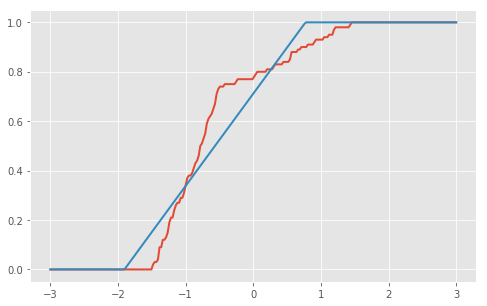

In [46]:
fit_unif_model = scs.distributions.uniform(a, b-a)

fig, ax = plt.subplots(1, figsize=(8, 5))
superimpose_cdf_of_fit_model(unif_mixture_data, fit_unif_model, ax)

Looks *awful*.  It's important to **look at your data**, and specify a good model.

## The Maximum Likelihood Method

The *maximum likelihood method* is a more modern method for fitting statistical models to data.  

Our goal is to make the following philosophy of model fitting precise

> The fit model should be the random variable *most likely* to generate the data.

We already know how to generate data, this is just *sampling*, so we need to make the phrase *most likely* precise.

**Question:** Consider the following density function of a normal distribution.

What is the data value *most likely to be generated* when sampling from this distribution?

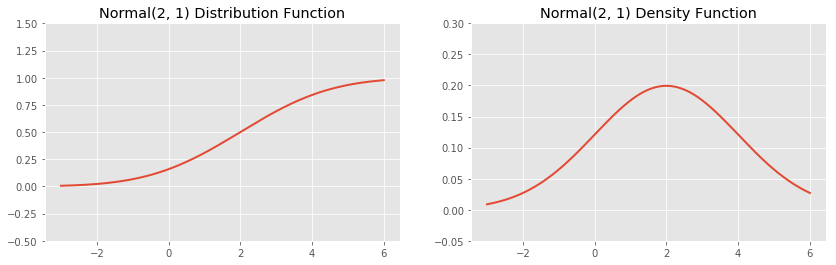

In [47]:
mu, sig = (2, 2)
normal = scs.norm(mu, sig)

x = np.linspace(-3, 6, num=250)
fig, ax = plt.subplots(1, 2, figsize=(14, 4))

ax[0].plot(x, normal.cdf(x), linewidth=2)
ax[0].set_ylim(-0.5, 1.5)
ax[0].set_title("Normal(2, 1) Distribution Function")

ax[1].plot(x, normal.pdf(x), linewidth=2)
ax[1].set_ylim(-0.05, 0.3)
ax[1].set_title("Normal(2, 1) Density Function");

**Question:** Consider a single data value, represented in the plots below as a large black dot.  Which is the *normal distribution most likely to have generated this data point*?  Note, this is the reverse question from the previous one.  Pay attention to possible objections to your answer.

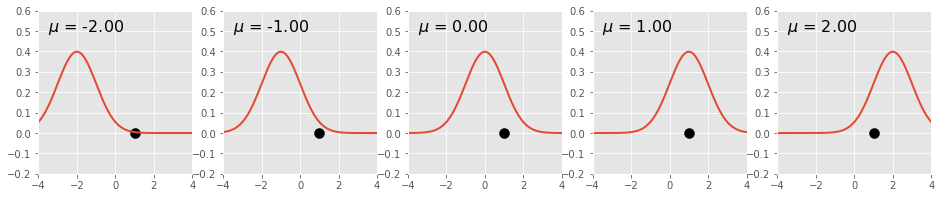

In [48]:
mus = [-2, -1, 0, 1, 2]
normal_dists_varying_mean = [scs.norm(mu, 1) for mu in mus] 

x = np.linspace(-4, 4, num=250)
fig, axs = plt.subplots(1, 5, figsize=(16, 3))

for i, ax in enumerate(axs.flatten()):
    ax.plot(x, normal_dists_varying_mean[i].pdf(x), linewidth=2)
    ax.scatter([1], [0], s=100, c="black")
    ax.set_ylim(-0.2, 0.6)
    ax.set_xlim(-4, 4)
    ax.text(-3.5, 0.5, r"$\mu$ = {:2.2f}".format(mus[i]),
            fontsize=16)

The distribution most likely to generate the point is, intuitively, the one where the *mode* of the distribution *coincides with* the data value.

**Counterpoint:** Isn't the probability that **any** of these distributions generates the data point **exactly** equal to zero?

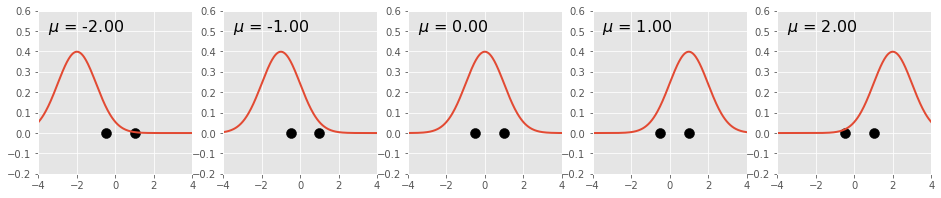

In [49]:
mus = [-2, -1, 0, 1, 2]
normal_dists_varying_mean = [scs.norm(mu, 1) for mu in mus] 

x = np.linspace(-4, 4, num=250)
fig, axs = plt.subplots(1, 5, figsize=(16, 3))

for i, ax in enumerate(axs.flatten()):
    ax.plot(x, normal_dists_varying_mean[i].pdf(x), linewidth=2)
    ax.scatter([1,-0.5], [0,0], s=100, c="black")
    ax.set_ylim(-0.2, 0.6)
    ax.set_xlim(-4, 4)
    ax.text(-3.5, 0.5, r"$\mu$ = {:2.2f}".format(mus[i]),
            fontsize=16)

Said differently, to find the distribution that is most likely to have generated a data point $x$, we find the parameter $\theta$ that maximizes the density function evaluated at $x$

$$ \text{maximize by finding} \ \theta \ \{ f(x; \theta) \} $$

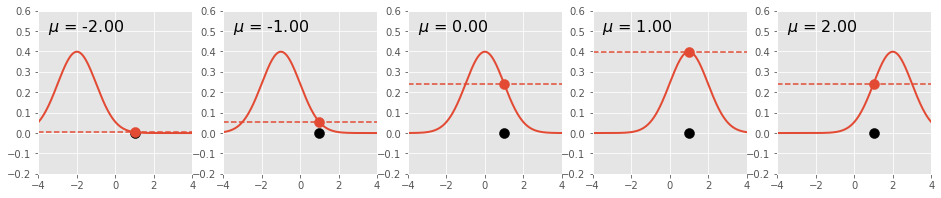

In [50]:
normal_dists_varying_mean = [
    scs.norm(mu, 1) for mu in [-2, -1, 0, 1, 2]
]

x = np.linspace(-4, 4, num=250)
fig, axs = plt.subplots(1, 5, figsize=(16, 3))

for i, ax in enumerate(axs.flatten()):
    ax.plot(x, normal_dists_varying_mean[i].pdf(x), linewidth=2)
    ax.scatter([1], [0], s=100, c="black")
    ax.scatter([1], [normal_dists_varying_mean[i].pdf(1)], s=100)
    ax.axhline(y=normal_dists_varying_mean[i].pdf(1), linestyle="--") 
    ax.set_ylim(-0.2, 0.6)
    ax.set_xlim(-4, 4)
    ax.text(-3.5, 0.5, r"$\mu$ = {:2.2f}".format(mus[i]),
        fontsize=16)

When our data $x$ is fixed, and we are thinking of changing $\theta$, we call this the **likelihood function**.

$$ L(\theta) = f(x; \theta) $$

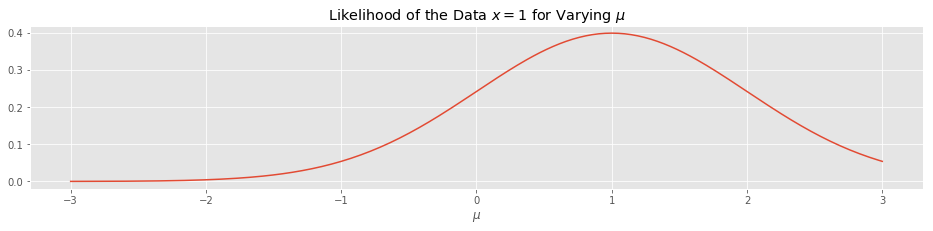

In [51]:
fig, ax = plt.subplots(figsize=(16, 3))

x = 1  # This is the fixed data
t = np.linspace(-3, 3, num=250)

def likelihood(mu):
    normal = scs.norm(mu, 1)
    return normal.pdf(x)

ax.plot(t, likelihood(t))
ax.set_title("Likelihood of the Data $x = 1$ for Varying $\mu$")
ax.set_xlabel("$\mu$")

### Definition

Suppose $M$ is a statistical model, with a parameter $\theta$.  Then each of the random variables in the model has a density function, and the parameter $\theta$ appears in the density function

$$ f(t; \theta) $$

Denote by $x_i$ a set of data.

The **likelihood function of the model given the data** is a function of the **parameter**, it informally measures the likelihood of observing the data you have as you vary the parameters in the model

$$ L(\theta) = \prod_i f(x_i; \theta) $$

In practice, the log-likelihood is more computationally convenient

$$ LL(\theta) = \sum_i \log( f(x_i, \theta) ) $$

To **fit a model by the likelihood method we find the parameters $\theta$ that maximize the likelihood function**.

### Example: Normal Distribution, Unknown Mean and Variance

Let's reuse the normal data from before

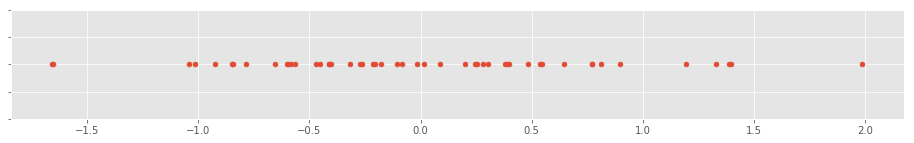

In [52]:
fig, ax = plt.subplots(1, figsize=(16, 2))
one_dim_scatterplot(data, ax, s=25)

In [53]:
mu_hat = np.mean(data)
sigma_sq_hat = np.var(data)
print("sample mean: {:2.3f}\nsample variance: {:2.3f}".format(mu_hat, sigma_sq_hat))

sample mean: -0.005
sample variance: 0.586


An attempt to fit a normal distribution to this data using the likelihood method.

#### Step 1: Write down the model.

Our model contains all normal random variables with varying mean and variance.

$$ M = \{ N(\mu, \sigma^2) \mid \mu \in \mathbb{R}, \sigma^2 \in \mathbb{R}^+ \} $$

#### Step 2: Write down the density functions of all the random variables in the model.

The density function of a normal distribution with unknown mean and variance is:

$$ f(t; \mu, \sigma^2) = \frac{1}{\sqrt{2 \pi \sigma^2}} e^{ - \frac{(t - \mu)^2}{2 \sigma^2}} $$

This pdf has arguments for both the **data** and the **parameters**:

$$ f(\underbrace{t}_{\text{data}}; \underbrace{\mu, \sigma^2}_{\text{parameters}}) $$

I can access this function in python by using `scs.norm(mu, sigma).pdf(t)`.

#### Step 3: Either differentiate the log likelihood function analytically, or write code to compute the log likelihood function of the model given the data.

Remember that the data is *fixed* and we want to vary the *parameters*, so the way we write our function should respect that.

In [54]:
def log_likelihood_normal_two_parameters(mu, sigma_sq, data):
    normal = scs.norm(mu, np.sqrt(sigma_sq))
    likelihoods = [normal.pdf(datum) for datum in data]
    return np.sum(np.log(likelihoods))

As a sanity check, we can evaluate the log-likelihood function at various values of the parameters.

In [55]:
for mu, sigma_sq in product([-1, 0, 1], [0.5, 1, 2]):
    print("Log-Lik of Two Parameter Normal Model With mu={0}, sigma_sq={1}: {2:3.2f}".format(
        mu, sigma_sq, log_likelihood_normal_two_parameters(mu, sigma_sq, data)
    ))

Log-Lik of Two Parameter Normal Model With mu=-1, sigma_sq=0.5: -107.41
Log-Lik of Two Parameter Normal Model With mu=-1, sigma_sq=1: -85.34
Log-Lik of Two Parameter Normal Model With mu=-1, sigma_sq=2: -82.97
Log-Lik of Two Parameter Normal Model With mu=0, sigma_sq=0.5: -57.91
Log-Lik of Two Parameter Normal Model With mu=0, sigma_sq=1: -60.59
Log-Lik of Two Parameter Normal Model With mu=0, sigma_sq=2: -70.60
Log-Lik of Two Parameter Normal Model With mu=1, sigma_sq=0.5: -108.41
Log-Lik of Two Parameter Normal Model With mu=1, sigma_sq=1: -85.84
Log-Lik of Two Parameter Normal Model With mu=1, sigma_sq=2: -83.22


Out of all these options, the log-likelihood is maximized fo `mu=0, sigma_sq=0.5`, which seems reasonable given the plot of our data.

#### Step 4: Find the parameters that maximize the log-likelihood.

Eyeballing our simple grid search above, it seems like $\mu = 0, \sigma^2 = 0.5$ is the best of what we tried.

In practice, we use an algorithm like *gradient descent* to find a good approximation to the maximal parameters, this process is called **optimization**.

In python, we can use built in optimizer to find the maximal parameters.

In [56]:
# The optimizer needs a function that consumes a single numpy array
def wrapper_for_scipy(x, data):
    return -log_likelihood_normal_two_parameters(x[0], x[1], data)

fit_parms = optim.minimize(wrapper_for_scipy, (0, 1), args=(data), method='Nelder-Mead')
mu_best, sigma_sq_best = fit_parms.x

print("Log-Lik Optimal Parameters: mu = {0:2.3f}, sigma_sq = {1:2.3f}".format(mu_best, sigma_sq_best))

Log-Lik Optimal Parameters: mu = -0.005, sigma_sq = 0.586


In [57]:
mu_hat

-0.0049916064123723845

In [58]:
sigma_sq_hat

0.58581753167633199

**Note**: In this example the estimated parameters using the method of moments vs. Those estimated using maximum likelihood *agree*.  This is a special property of the normal model, and it not true in general.

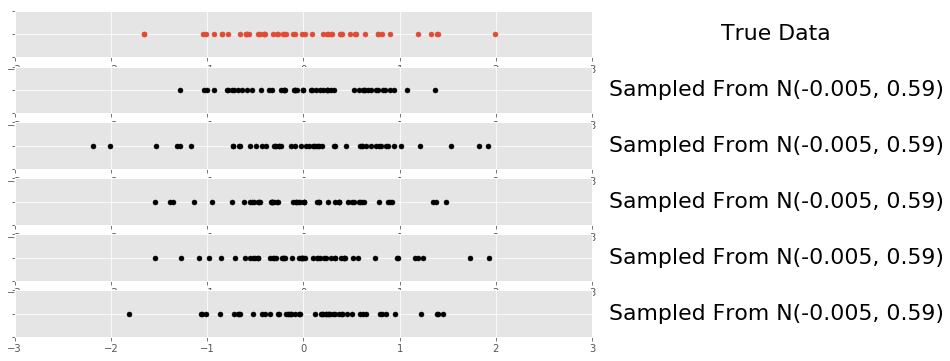

In [59]:
fig = plt.figure(figsize=(16, 6)) 
ax = plt.subplot2grid((6, 3), (0, 0), colspan=2)
ax.set_xlim(-3, 3)
one_dim_scatterplot(data, ax, s=25)
ax = plt.subplot2grid((6, 3), (0, 2), colspan=1)
text_in_blank_plot("True Data", ax)

for i in range(5):
    normal = scs.distributions.norm(mu_hat, np.sqrt(sigma_sq_hat))
    sample = normal.rvs(size=50)
    ax = plt.subplot2grid((6, 3), (i + 1, 0), colspan=2)
    ax.set_xlim(-3, 3)
    one_dim_scatterplot(sample, ax, s=25, c="black")
    ax = plt.subplot2grid((6, 3), (i + 1, 2), colspan=1)
    text_in_blank_plot("Sampled From N({0:0.3f}, {1:0.2f})".format(
                       mu_hat, sigma_sq_hat), ax)

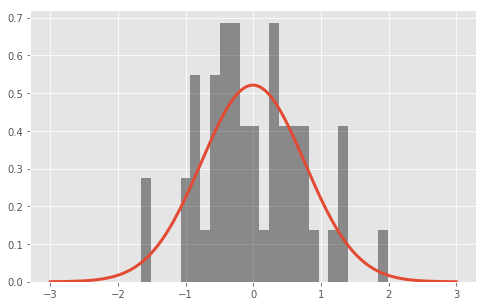

In [60]:
fit_two_param_model = scs.distributions.norm(mu_hat, np.sqrt(sigma_sq_hat))

fig, ax = plt.subplots(1, figsize=(8, 5))
superimpose_pdf_of_fit_model(data, fit_two_param_model, ax)

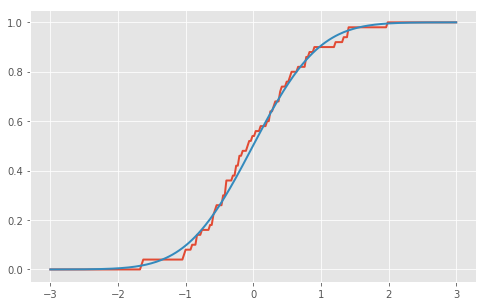

In [61]:
fig, ax = plt.subplots(1, figsize=(8, 5))
superimpose_cdf_of_fit_model(data, fit_two_param_model, ax)

### Appendix: Uniform Distribution: Both Bounds Unknown

Consider the following data, generated from an unknown uniform distribution.

In [62]:
a, b = (-1.1, 0.9)
unif = scs.uniform(a, b-a)

unif_data = unif.rvs(100)

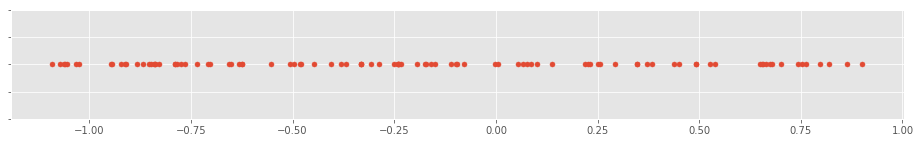

In [63]:
fig, ax = plt.subplots(1, figsize=(16, 2))
one_dim_scatterplot(unif_data, ax, s=25)

Our model is

$$ M = \{ \text{Unif}(a, b) \mid a < b \} $$

which we already derived the method of moments estimates for.  We'll encapsulate this in a function below.

In [64]:
def uniform_method_of_moments(data):
    mu_hat = np.mean(data)
    sigma_sq_hat = np.var(data)
    return mu_hat - np.sqrt(3 * sigma_sq_hat), mu_hat + np.sqrt(3 * sigma_sq_hat)

In [65]:
a, b = uniform_method_of_moments(unif_data)

print("Method of Moments estimates: a = {0:2.2f}, b = {1:2.2f}".format(a, b))

Method of Moments estimates: a = -1.20, b = 0.81


The maximum likelihood estimates of the parameters are

$$ \hat a = \min x_i, \ \hat b = \max x_i $$

**Bonus:** It's a worthwhile exercise to convince yourself this is true.  If you can do so, you really do understand maximum likelihood!

In [66]:
def uniform_maximum_likelihood(data):
    return data.min(), data.max()

In [67]:
a, b = uniform_maximum_likelihood(unif_data)

print("Maximum likelihood estimates: a = {0:2.2f}, b = {1:2.2f}".format(a, b))

Maximum likelihood estimates: a = -1.09, b = 0.90


This time the parameters estimated by the two methods are *different*.

We can check the fit of our model in the usual ways.

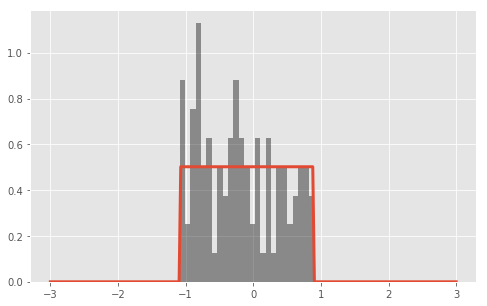

In [68]:
fit_unif_model = scs.uniform(a, b-a)

fig, ax = plt.subplots(1, figsize=(8, 5))
superimpose_pdf_of_fit_model(unif_data, fit_unif_model, ax)

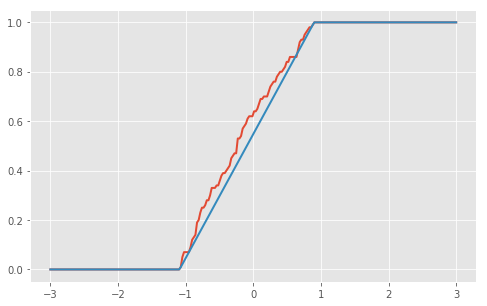

In [69]:
fit_unif_model = scs.distributions.uniform(a, b-a)

fig, ax = plt.subplots(1, figsize=(8, 5))
superimpose_cdf_of_fit_model(unif_data, fit_unif_model, ax)